In [1]:
import numpy as np
from matplotlib import pyplot as plt

# load and process data
data = np.loadtxt('../data_sets/ex1data2.txt', delimiter = ',')
x_data = data[:, 0:2]
y_data = data[:, 2]
print('x_data.shape: ', x_data.shape)
print('y_data.shape: ', y_data.shape)

# initialization
m = y_data.size
theta = np.zeros(3)
num_iteration = 100
alpha = 1.2
J = np.zeros(num_iteration)

x_data.shape:  (47, 2)
y_data.shape:  (47,)


In [2]:
# Feature scaling - Normalization and standardization 
# z-score standardization
def feature_scaling(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x = (x - mu) / sigma
    return x

def cost_function(theta, x, y, m):
    # hypothesis
    h_x = x @ theta  # x->[47,3],theta->[3,1],h_x->[47,1]
    return np.sum((h_x-y)**2)/(2*m), h_x

def gradient_descent(theta, x, y, m, num_iteration, J):
    for i in range(num_iteration):
        J[i], h_x = cost_function(theta, x, y, m)
        theta = theta - (alpha/m) * ((h_x - y) @ x)
        print('num_iteration:{}, cost_values:{}'.format(1+i, J[i]))
    return theta, J

Start training ... 
num_iteration:1, cost_values:65591548106.45744
num_iteration:2, cost_values:7828546391.702185
num_iteration:3, cost_values:4595162832.427102
num_iteration:4, cost_values:3877239479.271789
num_iteration:5, cost_values:3426198089.9162583
num_iteration:6, cost_values:3092667220.980161
num_iteration:7, cost_values:2840704423.755805
num_iteration:8, cost_values:2649476645.502242
num_iteration:9, cost_values:2504158970.4995604
num_iteration:10, cost_values:2393688550.733585
num_iteration:11, cost_values:2309699943.2248154
num_iteration:12, cost_values:2245842949.6013985
num_iteration:13, cost_values:2197291682.13135
num_iteration:14, cost_values:2160377448.840796
num_iteration:15, cost_values:2132310999.2483287
num_iteration:16, cost_values:2110971648.3883145
num_iteration:17, cost_values:2094747012.4702222
num_iteration:18, cost_values:2082411172.5632002
num_iteration:19, cost_values:2073032043.9423954
num_iteration:20, cost_values:2065900948.329989
num_iteration:21, cos

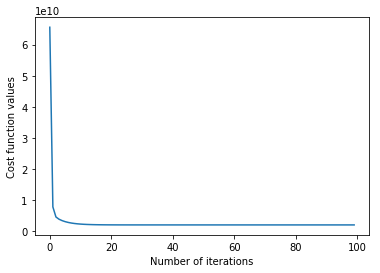

In [3]:
# build the model
print('Start training ... ')
# add one dimension onto x_data with x0 = 1
x0 = np.ones(m)
x_data = feature_scaling(x_data)
x_data = np.column_stack((x0, x_data))
theta, J = gradient_descent(theta, x_data, y_data, m, num_iteration, J)
# plot the cost function
plt.xlabel('Number of iterations')
plt.ylabel('Cost function values')
plt.plot(J)
print('theta:', theta)
print('Complete the training !!! ')

# Normal equation 
theta = np.linalg.inv(x_data.T @ x_data) @ x_data.T @ y_data
print('Normal equation\'s theta: ', theta)
